In [28]:
#a
import numpy as np
from scipy.linalg import hilbert, norm, lu_factor, lu_solve, cho_factor, cho_solve

# Tabelle Erstellen
results = []

for n in range(2, 14):  
    A = hilbert(n) #A definieren
    x_true = np.zeros(n)
    x_true[0] = 1
    x_true[-1] = 1 #Echte Loesung:x=(1,0,0,0...,0,1)definieren
    b = A @ x_true #B=Ax 

    cond = norm(A, ord=np.inf) * norm(np.linalg.inv(A), ord=np.inf) * 1e-16 #Konditionszahl berechnen

    
    x_bs = np.linalg.solve(A, b) #Direkt solve Ax=b
    err_bs = norm(x_true - x_bs, ord=np.inf) / norm(x_true, ord=np.inf)#Relative Fehler bestimmen

    
    lu, piv = lu_factor(A)
    x_lr = lu_solve((lu, piv), b)#Solve Ax=b mit LRzerlegung
    err_lr = norm(x_true - x_lr, ord=np.inf) / norm(x_true, ord=np.inf)#Relative Fehler bestimmen

    try:
        c, lower = cho_factor(A)
        x_chol = cho_solve((c, lower), b) #Solve mit Cholesky Zerlegung
        err_chol = norm(x_true - x_chol, ord=np.inf) / norm(x_true, ord=np.inf) #Relative Fehler bestimmen
        res_chol = norm(A @ x_chol - b, ord=np.inf) #Probewert
    except np.linalg.LinAlgError: #Fehlervermeiden
        x_chol = np.full(n, np.nan)
        err_chol = np.nan
        res_chol = np.nan

    results.append([n, cond, err_bs, err_lr, err_chol, res_chol])


import pandas as pd
df = pd.DataFrame(results, columns=[
    "n", "Konditionszahl ", "rel. Fehler(num)", "rel. Fehler (LU)", "rel. Fehler (Cholesky)", "Residu. (Cholesky)"
])

pd.set_option('display.float_format', '{:.2e}'.format)
print(df)


     n  Konditionszahl   rel. Fehler(num)  rel. Fehler (LU)  \
0    2         2.70e-15          6.66e-16          6.66e-16   
1    3         7.48e-14          5.33e-15          5.33e-15   
2    4         2.84e-12          4.37e-13          4.01e-13   
3    5         9.44e-11          1.55e-12          1.38e-12   
4    6         2.91e-09          1.17e-10          1.12e-10   
5    7         9.85e-08          2.50e-09          2.96e-09   
6    8         3.39e-06          2.97e-08          5.39e-08   
7    9         1.10e-04          5.23e-08          2.07e-06   
8   10         3.54e-03          1.27e-06          4.76e-05   
9   11         1.23e-01          2.61e-04          2.97e-04   
10  12         3.80e+00          1.99e-02          6.83e-02   
11  13         4.28e+01          7.33e-01          7.91e+00   

    rel. Fehler (Cholesky)  Residu. (Cholesky)  
0                 7.77e-16            0.00e+00  
1                 5.77e-16            0.00e+00  
2                 7.20e-13       

In [ ]:
#Cholesky Zerlegung schneidet bei großen n am schlechtesten ab.
#Bei n = 13 schlägt Cholesky Zerlegung sogar fehl , da die Matrix numerisch nicht mehr positiv definit ist.
#Wenn man n = 14 oder n = 15 untersucht, wird Cholesky ebenfalls fehlschlagen.
#Die Direktlösung ist relativ stabil

In [40]:
#b
import numpy as np

def tridiag_cholesky_solve(a, b, f):
   
    n = len(a)
    c = np.zeros(n)    
    d = np.zeros(n-1)  

    # Elemente von L bestimmen
    c[0] = np.sqrt(a[0])
    for i in range(1, n):
        d[i-1] = b[i-1] / c[i-1]
        c[i] = np.sqrt(a[i] - d[i-1]**2)

    # L y = f Loesen
    y = np.zeros(n)
    y[0] = f[0] / c[0]
    for i in range(1, n):
        y[i] = (f[i] - d[i-1]*y[i-1]) / c[i]

    # Lᵀ u = y Loesen
    u = np.zeros(n)
    u[-1] = y[-1] / c[-1] #Letzte Element von u berechnen
    for i in range(n-2, -1, -1):
        u[i] = (y[i] - d[i]*u[i+1]) / c[i]

    return u

n = 3
a = 2 * np.ones(n)      # a_n=2
b = -1 * np.ones(n-1)   # b_n=-1
f = 1 * np.ones(n)      # f_n=1

u = tridiag_cholesky_solve(a, b, f)
print("u=", u)

u= [1.5 2.  1.5]


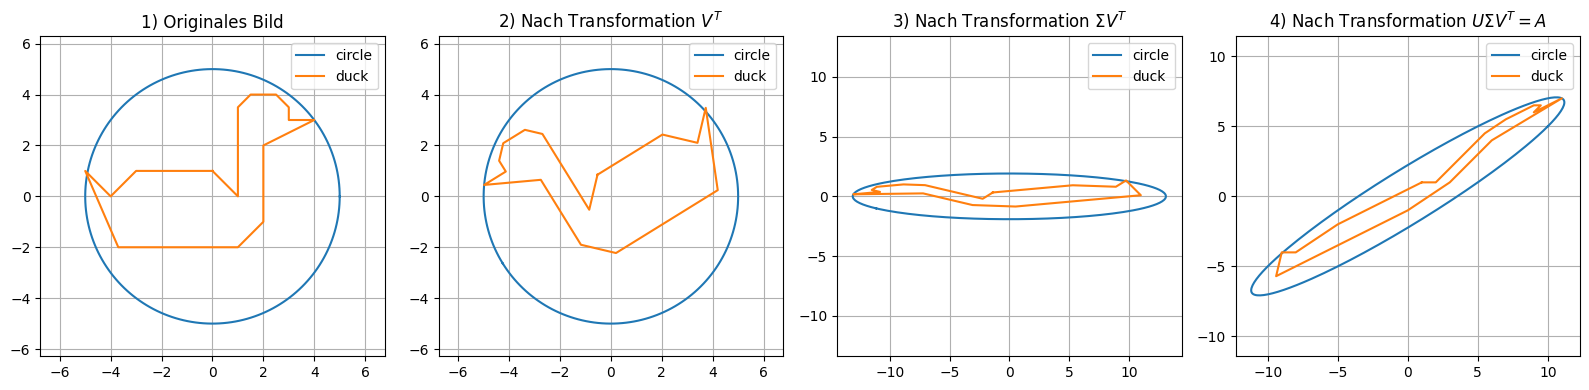

: 

In [ ]:
#c
import numpy as np
import matplotlib.pyplot as plt

# Duck outline
ente = np.array([
    [0, 1, 1, 1.5, 2.5, 3, 3, 4, 2, 2, 1, -3.7, -5, -4, -3, 0],
    [1, 0, 3.5, 4, 4, 3.5, 3, 3, 2, -1, -2, -2, 1, 0, 1, 1]
])

# Unit circle
r=5
t = np.linspace(0, 2*np.pi, 200)
circle = np.array([r*np.cos(t), r*np.sin(t)])


#Beliebige Transformationmatrix
A = np.array([[2, 1],
              [1, 1]])

# SVD zerlegung
U, S, VT = np.linalg.svd(A)
Sigma = np.diag(S) #Sigma_(i,i)=S, sonst=0

# Prozesse des transformations
ente_VT = VT @ ente
circle_VT = VT @ circle

ente_SVT = Sigma @ ente_VT
circle_SVT = Sigma @ circle_VT

ente_A = U @ ente_SVT
circle_A = U @ circle_SVT

# Plot
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
titles = [
    "1) Originales Bild",
    r"2) Nach Transformation $V^T$",
    r"3) Nach Transformation $\Sigma V^T$",
    r"4) Nach Transformation $U \Sigma V^T = A$"
]
data = [
    (ente, circle),
    (ente_VT, circle_VT),
    (ente_SVT, circle_SVT),
    (ente_A, circle_A)
]

for ax, (duck, cir), title in zip(axs, data, titles):
    ax.plot(cir[0], cir[1], label="circle")
    ax.plot(duck[0], duck[1], label="duck")
    ax.set_title(title)
    ax.axis("equal")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()